## Restricted Boltzmann Machines

In this project, I implemented a RBM. An RBM is a generative stochastic neural network composed of two layers: visible layer and hidden layer such that all hidden units are are connected to visibile units and vice versa. It is necessary to say that in the Restrcited BM, units in the same layer are not connected to each others. 

In the following, first, the MNIST has been loaded, and then they are preprocessed and visualized. Then, RBM has been trained using Contrastive Divergence.  


In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import os 

%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Set random seed to make result reproducible 
r_seed=1234
random_preseeded=np.random.RandomState(r_seed) 

### Data Handling 

Any data can be used with this code by repalcing load_mnist().

In [2]:
### load data and preporcess
from utility.data_utils import load_mnist
###########
# The load_mnist function loads MNIST dataset from http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz
#     Parameters:
#         input: 
#           mnist_file_path: mnist file location
#           file_name: file name to be saved 
#           f_source: file's url
#           num_training: To specifiy how many training samples to be returned, should be =<50000
#           num_val:   To specifiy how many validation samples to be returned, should be =<10000
#           num_test:  To specifiy how many validation samples to be returned, should be =<10000
#           
#         output:
#           X_train,y_train ==> training data
#           X_val,y_val     ==> validation data
#           X_test, Y_test  ==> test data
#
###########
X_train,y_train,X_val,y_val,X_test,y_test=load_mnist() 
#set dimension of mnist dataset
img_dim_mnist=28

The mnist.pkl.gz exits
Training ====> images (50000, 784) and lables (50000,)
Validation ==> images (10000, 784) and lables (10000,)
Test ========> images (10000, 784) and lables (10000,)
Done witd data loading.


###Visualization

######################################################
Training Data Visualization


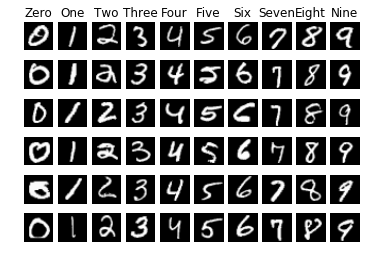

######################################################
Test Data Visualization


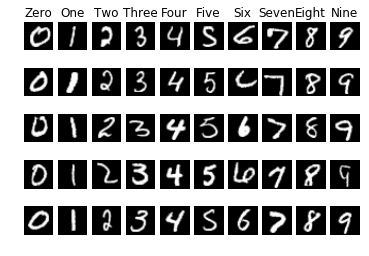

In [3]:
##Visualization
from utility.data_utils import vis_data
expample_per_class = 6
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
###########
#    vis_data() function shows some examples per classes.
#    Parameters:
#       input_data should be N*D where N is number of samples and D is data dimension.
#        labels: is  data labels
#        class_names: is name of each class
#        expample_per_class: number of random examples to be shown 
#        img_dim_mnist: input image dimension
###########            
print('######################################################')
print('Training Data Visualization')
vis_data(X_train,y_train,class_names,expample_per_class,img_dim_mnist)

print('######################################################')
print('Test Data Visualization')
expample_per_class=5
vis_data(X_test,y_test,class_names,expample_per_class,img_dim_mnist)

### Model Training

Here, the model traning will be started. In order to train a model, it needs to create an instance from RBM class and sets the parameters. 

('starting iteration ', 0)
Finished epoch 0 / 10: reconError 2.131130, lr_rate 1.000000e-03


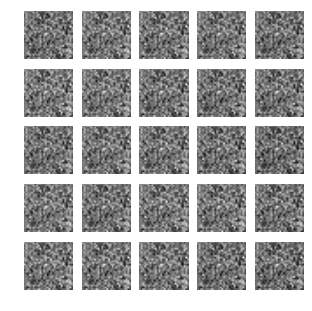

('starting iteration ', 400)
('starting iteration ', 800)
('starting iteration ', 1200)
Finished epoch 1 / 10: reconError 0.717328, lr_rate 9.500000e-04
('starting iteration ', 1600)
('starting iteration ', 2000)
('starting iteration ', 2400)
Finished epoch 2 / 10: reconError 0.637818, lr_rate 9.025000e-04


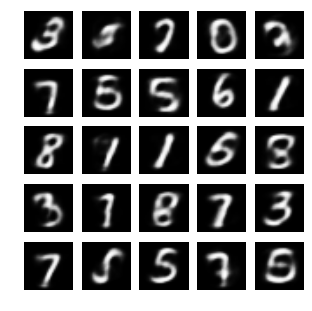

('starting iteration ', 2800)
('starting iteration ', 3200)
('starting iteration ', 3600)
Finished epoch 3 / 10: reconError 0.584205, lr_rate 8.573750e-04
('starting iteration ', 4000)
('starting iteration ', 4400)
('starting iteration ', 4800)
Finished epoch 4 / 10: reconError 0.505715, lr_rate 8.145062e-04


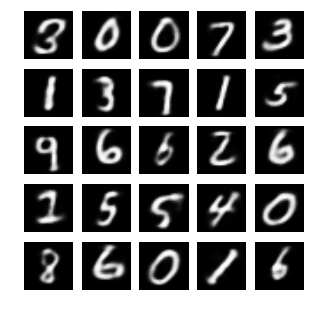

('starting iteration ', 5200)
('starting iteration ', 5600)
('starting iteration ', 6000)
Finished epoch 5 / 10: reconError 0.509272, lr_rate 7.737809e-04
('starting iteration ', 6400)
('starting iteration ', 6800)
('starting iteration ', 7200)
Finished epoch 6 / 10: reconError 0.440028, lr_rate 7.350919e-04


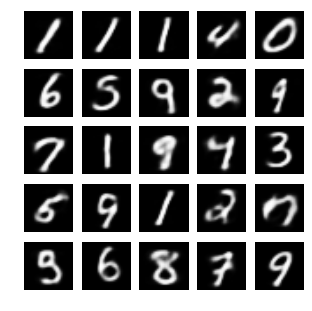

('starting iteration ', 7600)
('starting iteration ', 8000)
('starting iteration ', 8400)
Finished epoch 7 / 10: reconError 0.471048, lr_rate 6.983373e-04
('starting iteration ', 8800)
('starting iteration ', 9200)
('starting iteration ', 9600)
Finished epoch 8 / 10: reconError 0.461577, lr_rate 6.634204e-04


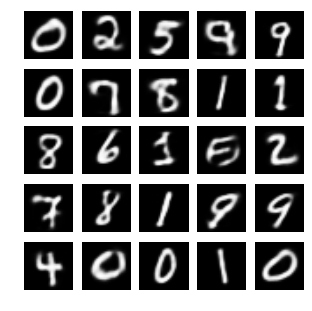

('starting iteration ', 10000)
('starting iteration ', 10400)
('starting iteration ', 10800)
('starting iteration ', 11200)
Finished epoch 9 / 10: reconError 0.449687, lr_rate 6.302494e-04
('starting iteration ', 11600)
('starting iteration ', 12000)
('starting iteration ', 12400)
Finished epoch 10 / 10: reconError 0.416453, lr_rate 5.987369e-04


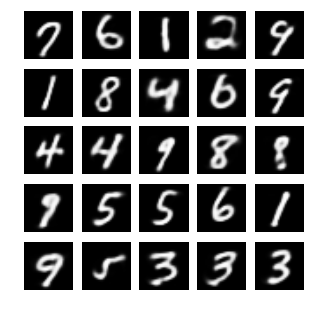

In [7]:
###########
# RBM class gets the folloing paramters: 
#    lr: is learning rate
#         lr_decay: is learning rate decay
#         regs_params: regularization parameters 
#         optimizer: Type of parameters update, can be sgd, adam, rmsprop,adagrad
#         b_size: is batach size
#         n_hiddens: is number of hidden units
#         n_epochs:  is number of training iterations
#         CDk: is number of of Gibbs sampling steps
#         rand_seed: set random seed to make result reproducible
#         sample_batches: if true will use mini-batches, if it is false, it uses full batch  
#         momentum: is used for momentum's parameter update
#         reg: is L2 regularization multiplier
#         negdata: is used to show images in negative phase 
###########

from method.rbm import *
rbm=RBM(optimizer='momentum',CDK=5,numhids=500,r_seed=r_seed,show_negdata=True,b_size=40)

###########
#train_with_CD will use "Contrastive Divergence" to train the model:
#   parameters:
#           input params:  training data
#           output params: learned model
###########
model=rbm.train_with_CD(X_train)